<a href="https://colab.research.google.com/github/shobhitexp/CODSOFT_Internship/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TITANIC SURVIVAL PREDICTION**

Problem statement

Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

* Supporting Packages

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##Data collecting

In [97]:
# loading the data using panas into titanic_data
titanic_data = pd.read_csv('/content/train.csv')

In [233]:
# checking our data
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [99]:
# checking the size of our data
titanic_data.shape

(891, 12)

In [100]:
# getting some info about data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
# Checking the number of missing value in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##Handiling the Missing values

* Cleaning Age Null value

In [102]:
#In the Age column, I am replacing the missing value with the Mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)

* Cleaning Cabin Null value

In [103]:
# Now because i get to know our Cabin column having a lot of missing value
## so droping the Cabin column
titanic_data=titanic_data.drop(columns='Cabin', axis=1)

* Cleaning the Embarked Null value

In [104]:
# Finding the Mode vale of "Embarked" column
# now according to most repeted Embarked we put same to null Embarked value
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [105]:
print(titanic_data['Embarked'].mode()[0])

S


In [106]:
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0], inplace = True)

In [107]:
titanic_data.isnull().sum()
# Now finally My Data is cleaned from Null values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Analysis

In [108]:
# Statitical measure about cleaned data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [109]:
# Finding the Number of people survived or not survived
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Data Visualization

In [110]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

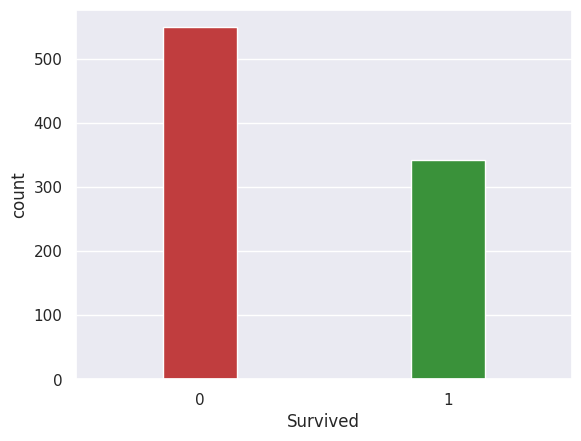

In [111]:
# Making a count plot for "Survived or Dead" column
sns.countplot(x = 'Survived', data = titanic_data, palette = ['tab:Red','tab:green'],width = 0.3)

In [112]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

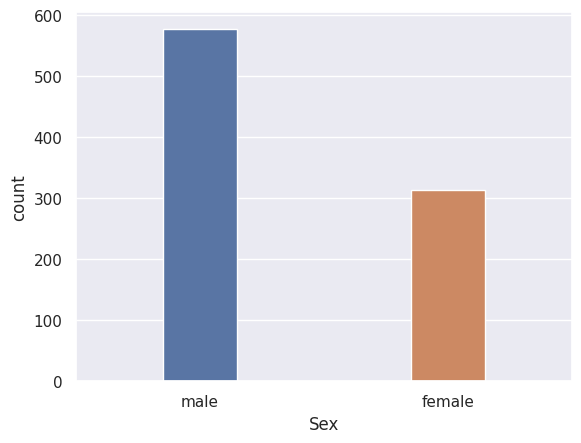

In [113]:
# Making a count plot for Death according to "Male and Female" column
sns.countplot(x = 'Sex', data = titanic_data , width = 0.3)

<Axes: xlabel='Sex', ylabel='count'>

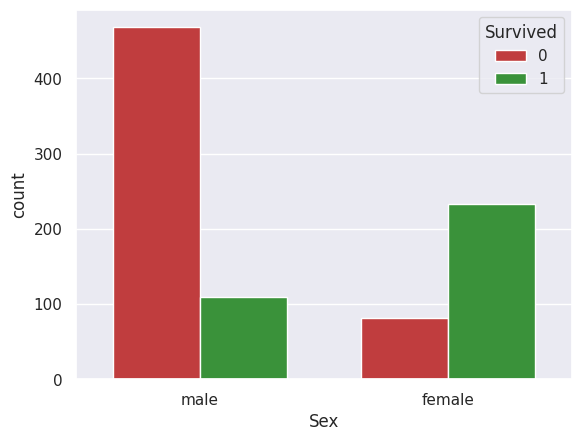

In [114]:
  # No of Survivers and Death's Gender Wise
  sns.countplot(x = 'Sex',hue='Survived',data=titanic_data,palette = ['tab:red','tab:green'] , width =0.7 )

In [115]:
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

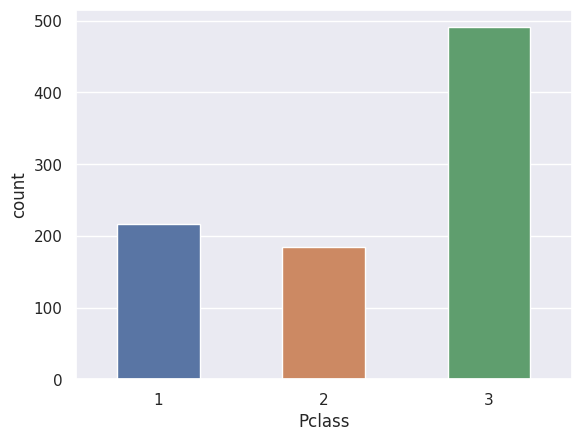

In [116]:
# Making a count plot for "Pclass"
sns.countplot(x = 'Pclass', data=titanic_data , width = 0.5)

<Axes: xlabel='Pclass', ylabel='count'>

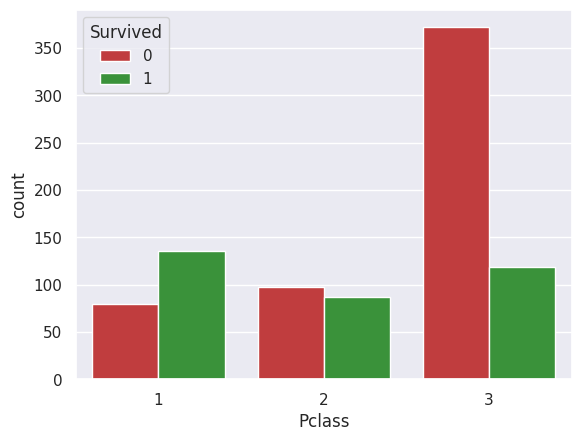

In [117]:
# No of (Green = Survivers) or (Red = Death) according to Pclass
sns.countplot(x = 'Pclass',hue='Survived',data=titanic_data, palette = ['tab:Red','tab:green'])

In [118]:
# Total no of pasengers having sibiling
titanic_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<Axes: xlabel='SibSp', ylabel='count'>

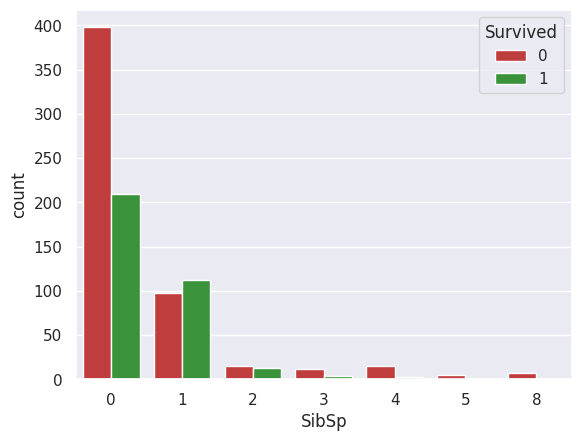

In [119]:
# No of (Green = Survivers) or (Red = Death) according to Sibling
sns.countplot(x = 'SibSp',hue='Survived',data=titanic_data, palette = ['tab:Red','tab:green'])

In [120]:
# Total no of pasengers Borded from different place
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

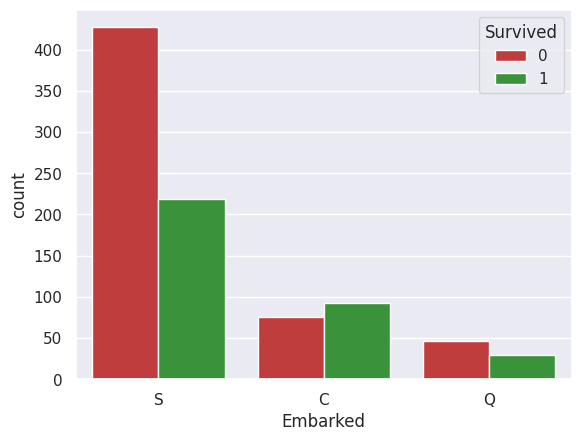

In [121]:
# No of (Green = Survivers) or (Red = Death) according to Embarked
sns.countplot(x = 'Embarked',hue='Survived',data=titanic_data, palette = ['tab:Red','tab:green'])

### Encoding the Categorical column


In [122]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [123]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Sex

* Male = 0
* Female = 1

Embarked
* S = 0
* C = 1
* Q = 2

In [124]:
titanic_data.replace({'Sex':{'male':0, 'female' : 1} , 'Embarked' : {'S':0,'C':1 , 'Q':2}}, inplace = True)

In [125]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


##Seperating features & Target

In [126]:
X = titanic_data.drop(columns = ['PassengerId' , 'Name' , 'Ticket' , 'Survived'] , axis=1)
Y = titanic_data['Survived']

In [127]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [128]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


##Splitting the data into **Traning Data** and **Testing Data**

In [223]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.3 , random_state = 2)

In [224]:
print(X.shape , X_train.shape , X_test.shape)

(891, 7) (623, 7) (268, 7)


##Model Traning

* Logistic Regression

In [225]:
model = LogisticRegression()

In [226]:
# Traning the Logistic Regression model with traning data
model.fit(X_train , Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Module Evaluation

* Accuracy Score

In [227]:
# Accuracy on traning Data
X_train_prediction = model.predict(X_train)

In [228]:
print(X_train_prediction)

[0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0
 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1
 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1
 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0
 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 

In [229]:
traning_data_accuracy = accuracy_score(Y_train , X_train_prediction)
print('Acurracy Score of traning Data :- ',(traning_data_accuracy*100),'%')

Acurracy Score of traning Data :-  81.2199036918138 %


In [230]:
# Accuracy on test Data
X_test_prediction = model.predict(X_test)

In [231]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1]


In [232]:
test_data_accuracy = accuracy_score(Y_test , X_test_prediction)
print('Acurracy Score of testing Data :- ',(test_data_accuracy*100),'%')

Acurracy Score of testing Data :-  79.47761194029852 %


conclusion : - In conclusion, the performance of the machine learning model utilizing logistic regression has been assessed based on its prediction accuracy. The model was trained on a dataset and achieved an accuracy of 81.2% on the training data. Upon evaluating the model's generalization ability, it demonstrated a prediction accuracy of 79.4% on previously unseen testing data. These results indicate that the model possesses a reasonable level of predictive capability, as evidenced by its ability to consistently perform well on both the training and testing datasets. While the model's accuracy on the testing data is slightly lower than that on the training data, this disparity is expected and can be attributed to the inherent variations in the data distribution. Overall, the logistic regression model exhibits promising predictive performance, although further optimization and evaluation may be pursued to enhance its accuracy and robustness for real-world applications.


Predicted by SHOBHIT RAJ...